# Clone Repository

In [ ]:
pip install git+https://github.com/amazon-science/chronos-forecasting.git

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-f0b8vkuo
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-f0b8vkuo
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit eb7bdfc047de3e7af972b4ee7cf23a7968b7daa3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# Import Libraries

In [ ]:
import pandas as pd
import torch
from chronos import ChronosPipeline
import matplotlib.pyplot as plt
import numpy as np

# Define Pipeline

In [ ]:
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cuda",
    torch_dtype=torch.bfloat16,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


# Load Data

In [ ]:
!wget https://github.com/hilmizr/world_fertilizer_price/raw/master/03-07-24-modified_fertilizer_datav4.xlsx

--2024-08-26 09:33:25--  https://github.com/hilmizr/world_fertilizer_price/raw/master/03-07-24-modified_fertilizer_datav4.xlsx
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hilmizr/world_fertilizer_price/master/03-07-24-modified_fertilizer_datav4.xlsx [following]
--2024-08-26 09:33:26--  https://raw.githubusercontent.com/hilmizr/world_fertilizer_price/master/03-07-24-modified_fertilizer_datav4.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42802 (42K) [application/octet-stream]
Saving to: ‘03-07-24-modified_fertilizer_datav4.xlsx.7’

03-07-24-modified_f 100%[===================>]  41

In [ ]:
df = pd.read_excel('03-07-24-modified_fertilizer_datav4.xlsx', engine='openpyxl')
df

,date,dap_price,kcl_price,rock_price,tsp_price,urea_price
0,1993-11-01,140.40,112.50,31.5,112.50,82.80
1,1993-12-01,150.38,112.50,31.5,122.50,85.50
2,1994-01-01,150.00,112.50,31.5,125.00,85.50
3,1994-02-01,151.75,112.50,31.5,125.63,85.50
4,1994-03-01,155.88,112.50,31.5,127.50,98.63
...,...,...,...,...,...,...
361,2023-12-01,563.75,311.88,152.5,447.50,354.00
362,2024-01-01,596.25,296.25,152.5,450.63,335.38
363,2024-02-01,583.81,289.38,152.5,454.38,351.25
364,2024-03-01,617.50,300.50,152.5,449.00,330.00


In [ ]:
date_col = "date"
target_col = "dap_price"

In [ ]:
df = df.set_index(date_col)
df

,dap_price,kcl_price,rock_price,tsp_price,urea_price
date,,,,,
1993-11-01,140.40,112.50,31.5,112.50,82.80
1993-12-01,150.38,112.50,31.5,122.50,85.50
1994-01-01,150.00,112.50,31.5,125.00,85.50
1994-02-01,151.75,112.50,31.5,125.63,85.50
1994-03-01,155.88,112.50,31.5,127.50,98.63
...,...,...,...,...,...
2023-12-01,563.75,311.88,152.5,447.50,354.00
2024-01-01,596.25,296.25,152.5,450.63,335.38
2024-02-01,583.81,289.38,152.5,454.38,351.25


# Data Preprocessing

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
n_test = 12
train_data, test_data = train_test_split(df, test_size=n_test, shuffle=False)

In [ ]:
display(train_data)
display(test_data)

,dap_price,kcl_price,rock_price,tsp_price,urea_price
date,,,,,
1993-11-01,140.40,112.50,31.5,112.50,82.80
1993-12-01,150.38,112.50,31.5,122.50,85.50
1994-01-01,150.00,112.50,31.5,125.00,85.50
1994-02-01,151.75,112.50,31.5,125.63,85.50
1994-03-01,155.88,112.50,31.5,127.50,98.63
...,...,...,...,...,...
2022-12-01,625.00,513.75,300.0,584.38,519.38
2023-01-01,631.00,508.75,300.0,569.38,443.75
2023-02-01,612.50,496.88,322.5,547.50,357.50


,dap_price,kcl_price,rock_price,tsp_price,urea_price
date,,,,,
2023-05-01,510.00,372.50,345.00,485.63,329.25
2023-06-01,454.55,328.00,344.50,390.00,287.50
2023-07-01,458.75,341.25,342.50,392.25,334.63
2023-08-01,528.75,353.13,346.25,450.63,385.63
2023-09-01,527.90,352.00,347.50,461.50,380.00
2023-10-01,534.75,341.88,347.50,468.13,411.38
2023-11-01,535.63,331.88,347.50,462.63,385.50
2023-12-01,563.75,311.88,152.50,447.50,354.00
2024-01-01,596.25,296.25,152.50,450.63,335.38


# Forecast

In [ ]:
forecast = pipeline.predict(
    context=torch.tensor(train_data[target_col]),
    prediction_length=n_test,
    num_samples=20,
)

<ipython-input-10-e4ab9cbdfa2f>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context=torch.tensor(train_data[target_col]),


## Format

In [ ]:
forecast_index = test_data.index
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

In [ ]:
forecast_df = pd.DataFrame({
    'index': forecast_index,
    'low': low,
    'median': median,
    'high': high
}).set_index('index')

display(forecast_df)

,low,median,high
index,,,
2023-05-01,642.327624,659.774190,686.066841
2023-06-01,616.526419,683.118133,734.966339
2023-07-01,594.656795,688.032647,760.030362
2023-08-01,578.438897,676.974990,794.186317
2023-09-01,574.507282,689.261316,849.966054
2023-10-01,550.426122,694.175830,845.788717
2023-11-01,516.270211,706.462116,866.675411
2023-12-01,499.069411,716.291145,876.258714
2024-01-01,518.481743,683.118133,877.733140


## Evaluate

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [ ]:
def evaluate_forecast(y_true, y_pred):
    results = {
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }
    return pd.Series(results)

In [ ]:
evaluate_forecast(test_data[target_col].values, median)

,0
MAPE,0.284243
RMSE,155.124160
MAE,147.624456
R2,-9.792377


## Visualize

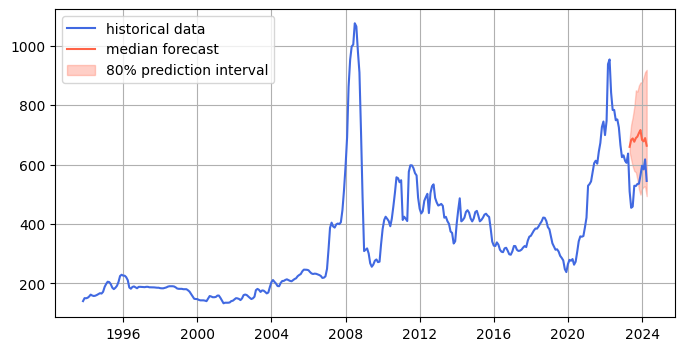

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(df[target_col], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()